## 0 Imports

In [65]:
import math
import numpy                           as np
from matplotlib import pyplot          as plt
from sklearn    import model_selection as ms
from sklearn    import metrics         as mt

## 1.0 Synthetic Regression Data

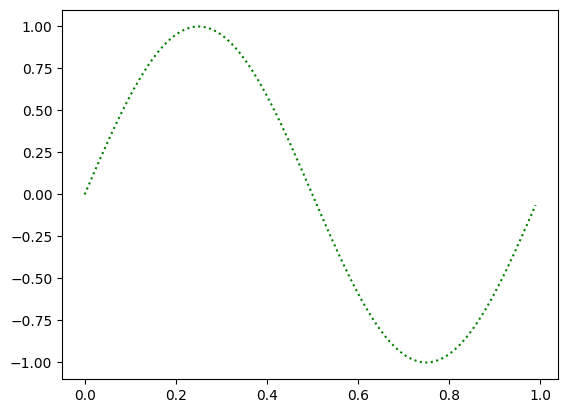

In [24]:
hidden_law = np.vectorize(lambda x: math.sin(2 * math.pi * x))
x_all = np.arange(0, 1, 0.01)
y_hidden = hidden_law(x_all)
plt.plot(x_all,y_hidden, ':g')

In [44]:
np.random.seed(42)
noise = 0.2
samples = 20

#dataset
x = np.random.rand(samples)
y = np.sin(2 * np.pi * x) + noise * np.random.randn(samples)

#split train test dataset

x_train,x_val, y_train, y_val = ms.train_test_split(x,y, test_size=0.3)

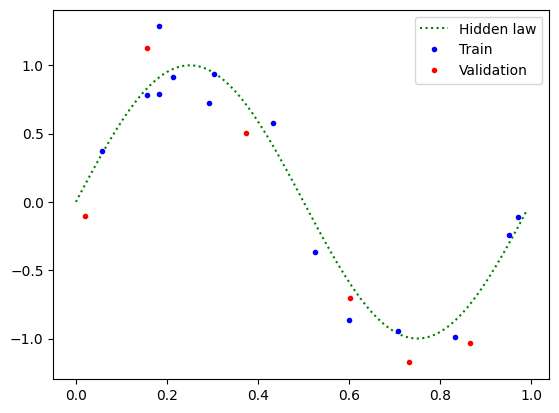

In [54]:
plt.plot(x_all,y_hidden, ':g')
plt.plot(x_train,y_train, 'b.')
plt.plot(x_val, y_val, 'r.')
plt.legend(['Hidden law', 'Train', 'Validation'])

In [68]:
# -- Training --
max_poly_degree = 14
poly_degrees = range(max_poly_degree)
polys = []


for p in poly_degrees:
    poly_model = np.polyfit(x_train,y_train, p)
    polys.append(poly_model)
    
# -- Predict

for p in poly_degrees:
    # predict over train dataset
    yhat_train = np.polyval( polys[p],x_train)
    rmse_train[p] = np.sqrt(mt.mean_squared_error(y_train,yhat_train))
    # predict over validation dataset
    yhat_val = np.polyval( polys[p], x_val)
    rmse_val[p] = np.sqrt (mt.mean_squared_error(y_val,yhat_val))

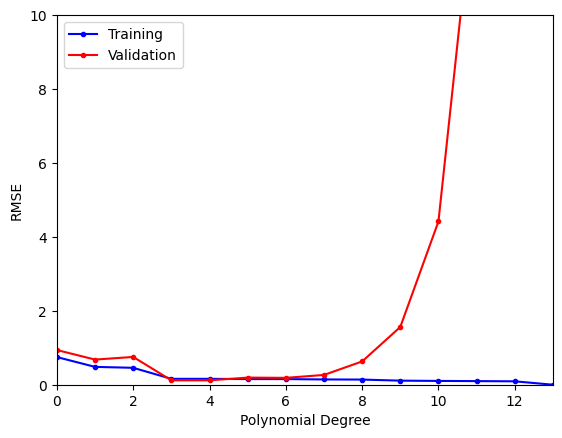

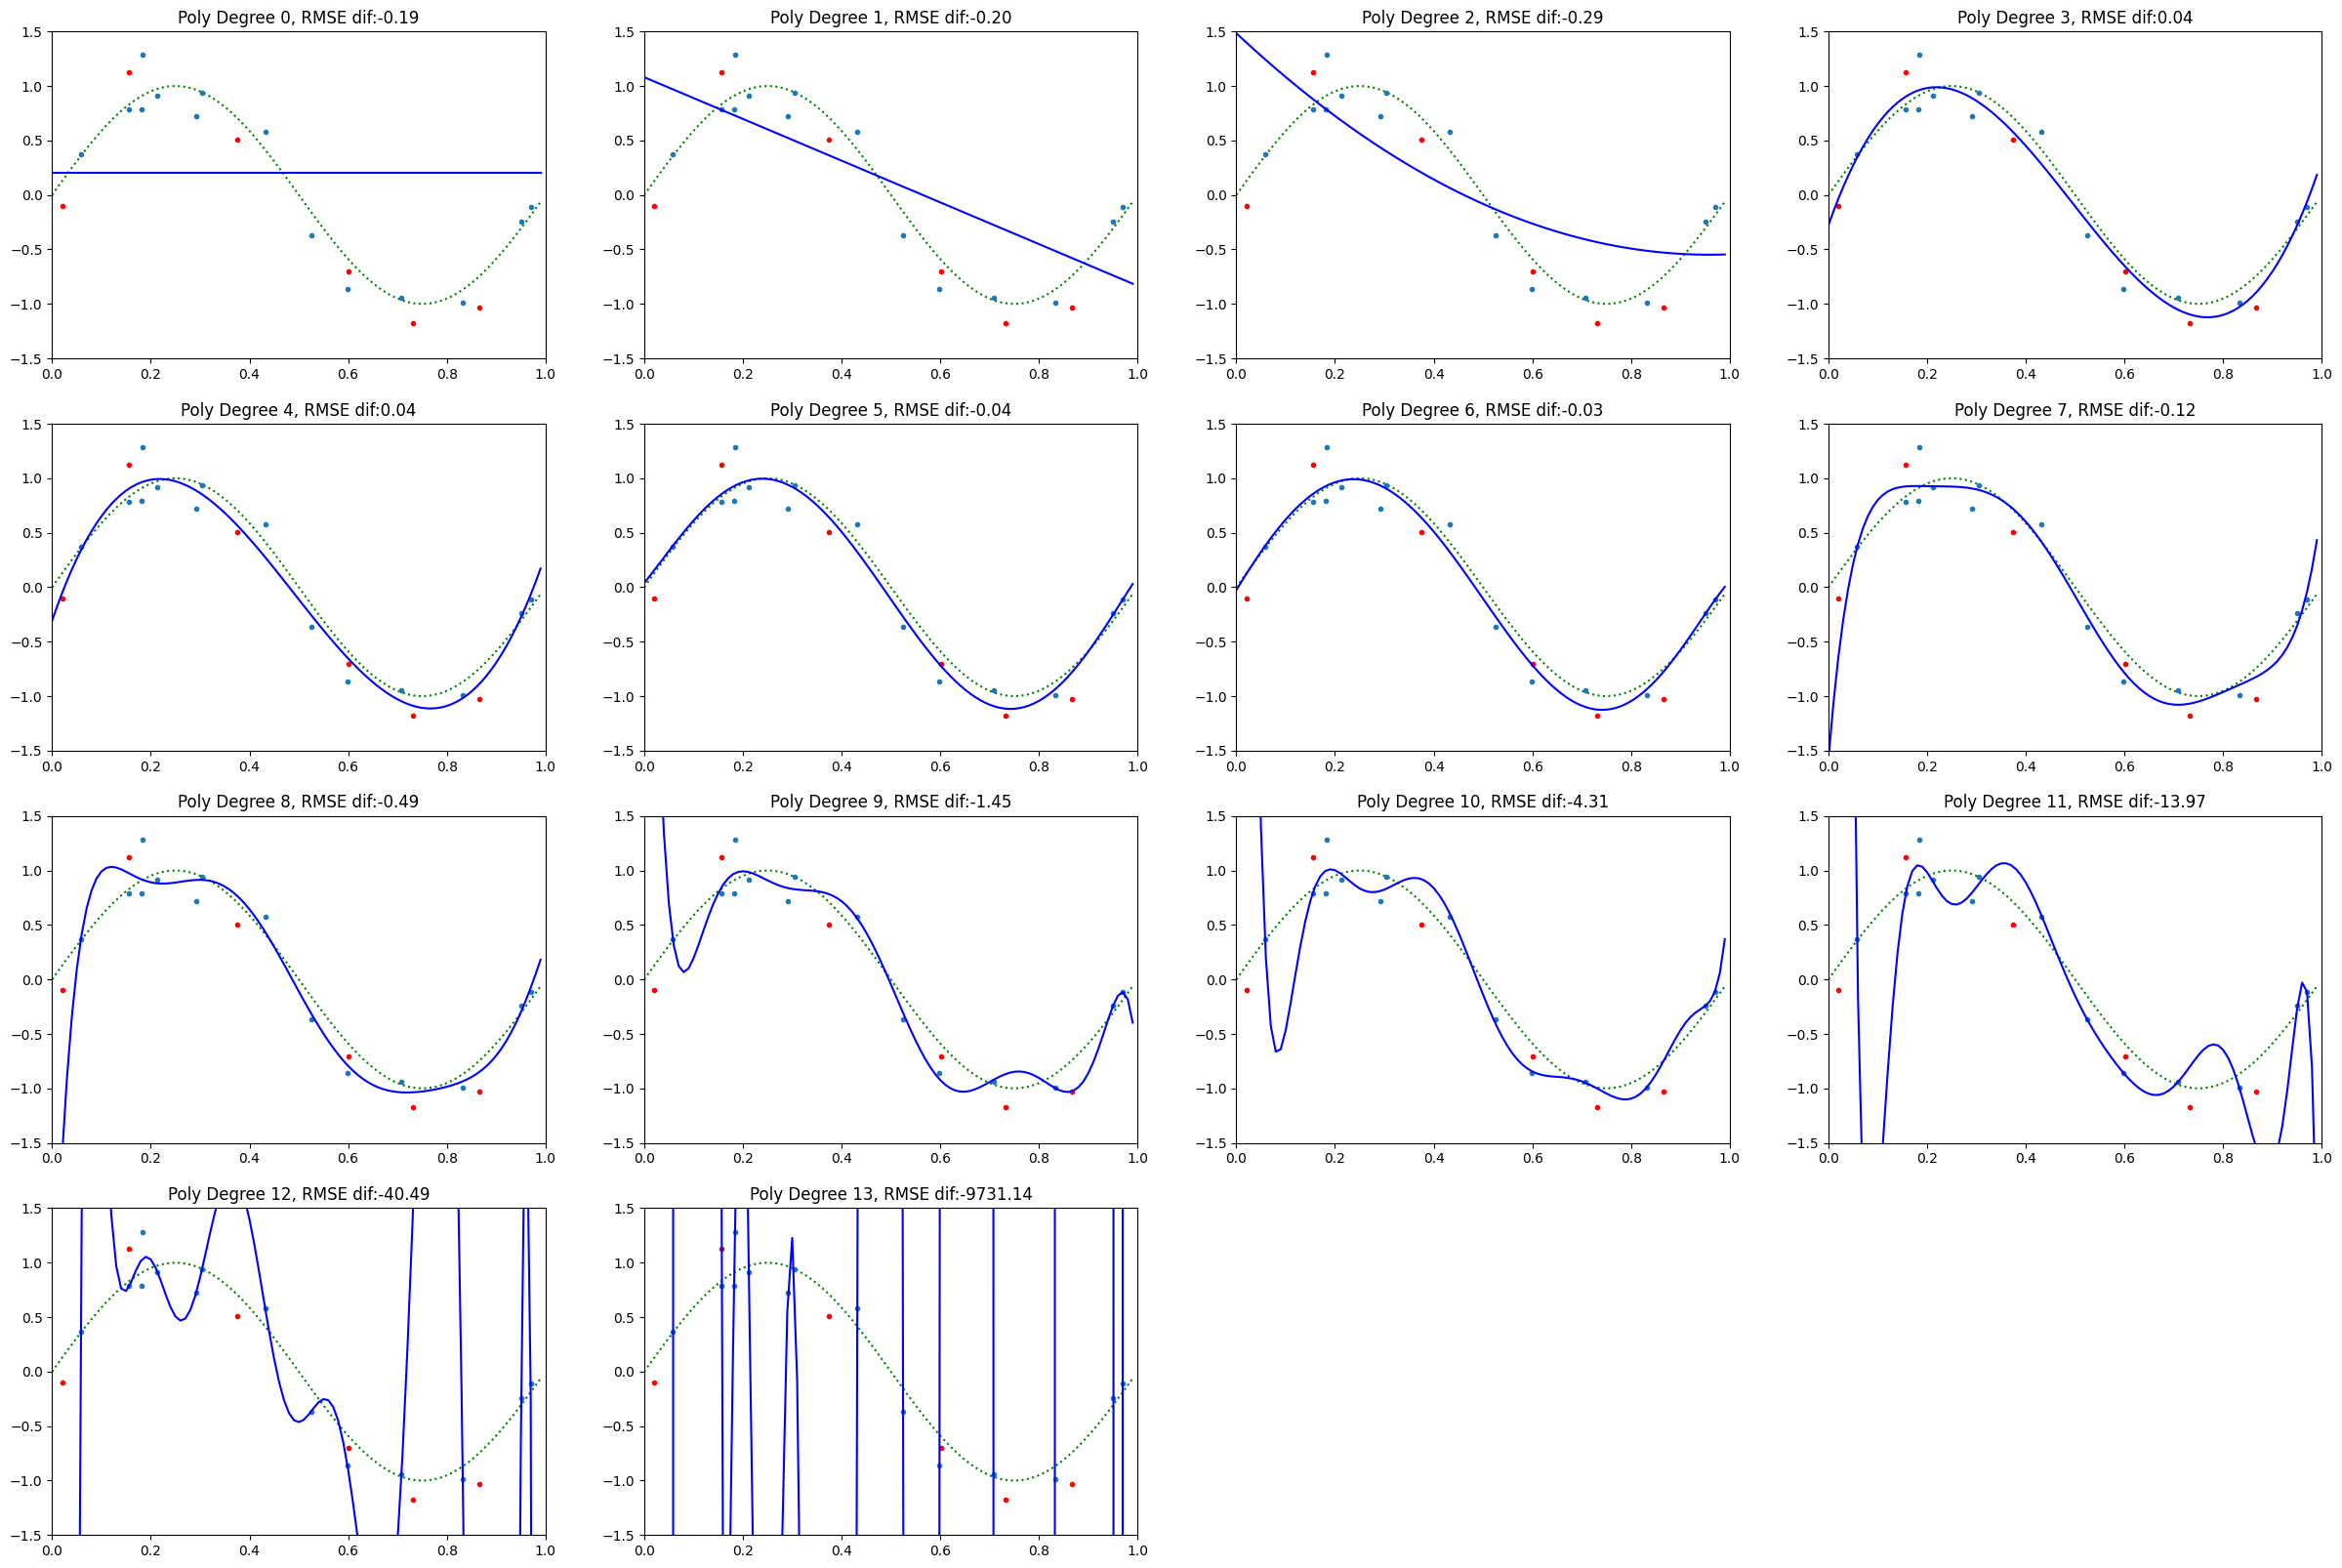

In [134]:
plt.plot( poly_degrees, rmse_train, '-b.')
plt.plot( poly_degrees, rmse_val, '-r.')
plt.axis((0,max_poly_degree-1,0,10))
plt.legend(['Training', 'Validation'])
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.figure(figsize=(30,20))
for p in poly_degrees:
    plt.subplot(4, 4, p+1)
    y_pol = np.polyval(polys[p], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_val, y_val, 'r.')
    plt.plot(x_all, y_pol, 'b')
    plt.title('Poly Degree {}, RMSE dif:{:.2f}'.format(p, rmse_train[p] - rmse_val[p]))
    plt.axis((0, 1, -1.5, 1.5))
